In [1]:
import numpy as np
import pandas as pd

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [3]:
!wget $data

--2021-09-27 11:44:55--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6,8M) [text/plain]
Saving to: 'AB_NYC_2019.csv.1'

     0K .......... .......... .......... .......... ..........  0% 1,47M 5s
    50K .......... .......... .......... .......... ..........  1% 2,39M 4s
   100K .......... .......... .......... .......... ..........  2% 1,43M 4s
   150K .......... .......... .......... .......... ..........  2% 3,85M 3s
   200K .......... .......... .......... .......... ..........  3% 3,02M 3s
   250K .......... .......... .......... .......... ..........  4% 22,1M 3s
   300K .......... .......... .......... .......... ..........  5% 3,58M 2s
   350K .......... ...

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Features

'neighbourhood_group',  
'room_type',  
'latitude',  
'longitude',  
'price',  
'minimum_nights',  
'number_of_reviews',  
'reviews_per_month',  
'calculated_host_listings_count',  
'availability_365'  

In [5]:
feature =['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [6]:
df_feature = df[feature]

df_feature.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [7]:
df_feature.isnull().any()

neighbourhood_group               False
room_type                         False
latitude                          False
longitude                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [8]:
df_feature['reviews_per_month'].fillna(0, inplace=True)

c:\users\fitri\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df_feature.isnull().any()

neighbourhood_group               False
room_type                         False
latitude                          False
longitude                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

#### Question 1
What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [10]:
df['neighbourhood_group'].mode()

0    Manhattan
dtype: object

#### Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value ('price') is not in your dataframe.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test = train_test_split(df_feature, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(X_test)

(39116, 9779)

In [14]:
X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=42)

In [15]:
len(X_train), len(X_test), len(X_val)

(29337, 9779, 9779)

In [16]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [17]:
y_train = X_train.price.values
y_val = X_val.price.values
y_test = X_test.price.values

In [18]:
del X_train['price']
del X_val['price']
del X_test['price']

#### Question 2
- Create the correlation matrix for the numerical features of your train dataset.
        - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

In [19]:
X_train.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [20]:
numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

X_train[numerical]

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.72760,-73.94495,3,29,0.70,13,50
1,40.70847,-74.00498,1,0,0.00,1,7
2,40.83149,-73.92766,40,0,0.00,1,0
3,40.66448,-73.99407,2,3,0.08,1,0
4,40.74118,-74.00012,1,48,1.80,2,67
...,...,...,...,...,...,...,...
29332,40.71748,-73.95685,6,5,0.13,1,0
29333,40.66397,-73.98538,1,7,0.17,2,0
29334,40.79994,-73.97001,1,1,0.64,1,88
29335,40.69585,-73.96344,60,0,0.00,1,0


In [21]:
corrMatrix = X_train[numerical].corr()

corrMatrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


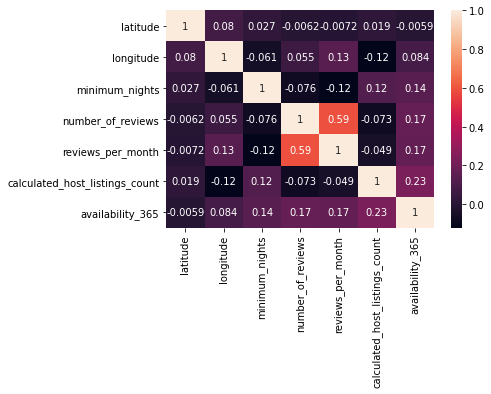

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Make price binary
We need to turn the price variable from numeric into binary.
Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [23]:
y_train

array([ 99,  57,  70, ..., 299,  65,  92], dtype=int64)

In [24]:
above_average = (y_train >= 152).astype(int)

#### Question 3
- Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
- Which of these two variables has bigger score?
- Round it to 2 decimal digits using round(score, 2)

In [25]:
categorial_columns = list(X_train.dtypes[X_train.dtypes == 'object'].index)
categorial_columns

['neighbourhood_group', 'room_type']

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
def mutual_info_biggest_score(series):
    return mutual_info_score(series,above_average)

In [28]:
mi = X_train[categorial_columns].apply(mutual_info_biggest_score)
round(mi, 2)

neighbourhood_group    0.05
room_type              0.14
dtype: float64

#### Question 4
- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
- Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [29]:
# one-hot encoding
from sklearn.feature_extraction import DictVectorizer

In [30]:
dv = DictVectorizer(sparse = False)

In [31]:
train_dicts = X_train[categorial_columns + numerical].to_dict (orient='records')
X_train_2 = dv.fit_transform(train_dicts)
X_train_2.shape

(29337, 15)

In [32]:
val_dicts = X_val[categorial_columns + numerical].to_dict (orient='records')
X_val_2 = dv.fit_transform(val_dicts)
X_val_2.shape

(9779, 15)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [35]:
model.fit(X_train_2, y_train)

c:\users\fitri\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [43]:
y_pred = model.predict_proba(X_val_2)[:, 1]

In [59]:
above_average_val = (y_val >= 0.5).astype(int)
above_average_val

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
accurate = (y_val == above_average_val).mean()

round(accurate, 2)

0.0

#### Question 5
- We have 9 features: 7 numerical features and 2 categorical.
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
  - neighbourhood_group
  - room_type
  - number_of_reviews
  - reviews_per_month   
  
note: the difference doesn't have to be positive